In [1]:
import pandas as pd
import sqlite3


In [2]:
#install ipython SQL library
!pip install mysql-connector-python


In [3]:
import mysql.connector as cnn

In [4]:
mydb=cnn.connect(host="localhost",user="root",passwd="Gnanodaya@123")

In [5]:
mydb = cnn.connect(host = 'localhost',user = 'root',passwd = 'Gnanodaya@123',database = 'krishdb1')

In [6]:
mydb

In [ ]:
#storessalesdata_table=pd.read_sql_query('show tables from storessalesdata')

In [7]:
cursor=mydb.cursor()

In [8]:
cursor.execute("show databases")

In [9]:
#cursor.fetchall()

[('information_schema',),
 ('itskrishdb',),
 ('krishdb',),
 ('krishdb1',),
 ('mysql',),
 ('performance_schema',),
 ('sys',)]

In [ ]:
#cursor.execute('use krishdb1' )

In [13]:
cursor.execute('show tables')

In [14]:
cursor.fetchall()

[('storesalesdata',), ('storessalesdata',)]

In [15]:
Stores_data = pd.read_sql('select * from storessalesdata', con=mydb)


In [16]:
Stores_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.01605,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13794
1,DRC01,5.92,Regular,0.01928,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42279
2,FDN15,17.50,Low Fat,0.01676,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27002
3,FDX07,19.20,Regular,0.00000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.38000
4,NCD19,8.93,Low Fat,0.00000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520


In [17]:
Stores_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7055,FDF22,6.865,Low Fat,0.05678,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38330
7056,FDS36,8.380,Regular,0.04698,Baking Goods,108.1570,OUT045,2002,,Tier 2,Supermarket Type1,549.28497
7057,NCJ29,10.600,Low Fat,0.03519,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11365
7058,FDN46,7.210,Regular,0.14522,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.59766
7059,DRG01,14.800,Low Fat,0.04488,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.66998


In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from pandas.plotting import scatter_matrix
# Ignore Warnings
import warnings 
warnings.filterwarnings('ignore')

In [19]:
# Sklearn preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
import sklearn.metrics as metrics
from math import sqrt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [20]:
Stores_data.shape

(7060, 12)

In [21]:
Stores_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [22]:
Stores_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
Stores_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
"""Observation:- Here No missing values but is missing values are there like  catagorical we fill the missing values with Mode imputation,
                numerical column or contineous numericalfeatures so we fill it with Mean Imputation , 
                or if Discrete feature we fill with /ouliers we will fill with median"""

In [24]:
#Which features are categorical?
Stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060 entries, 0 to 7059
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                7060 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 662.0+ KB


In [25]:
def categorical(dataframe):
    categorical_features=[feature for feature in dataframe.columns if dataframe[feature].dtypes == 'O']
    print("No. of Categorical feature : ",len(categorical_features))
    print(categorical_features)

In [26]:

categorical(Stores_data)


No. of Categorical feature :  7
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
#Which features are numerical?
"""need to figure out Within numerical features are the values discrete, 
continuous, or timeseries based? Among other things this helps us select 
the appropriate plots for visualization."""

In [27]:
def numerical(dataframe):
    numerical_features=[feature for feature in dataframe.columns if dataframe[feature].dtypes != 'O']
    print("No. of Numerical feature : ",len(numerical_features),"\n")
    discrete_features=[feature for feature in numerical_features if dataframe[feature].nunique() <25 ]
    continous_features=[feature for feature in numerical_features if feature not in discrete_features]
    print("No. of Discrete feature : ",len(discrete_features))
    print(discrete_features,'\n')
    print("No. of Continous feature : ",len(continous_features))
    print(continous_features)

In [28]:
numerical(Stores_data)

No. of Numerical feature :  5 

No. of Discrete feature :  1
['Outlet_Establishment_Year'] 

No. of Continous feature :  4
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [29]:
#statistical analysis 
def describe_numer(dataframe):
    return dataframe.describe()
def describe_categ(dataframe):
    return dataframe.describe(include='O')

In [30]:
describe_numer(Stores_data)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,12.857645,0.063963,141.240683,2000.490935,2118.626809
std,4.643456,0.048625,62.411888,6.588984,1533.445843
min,4.555000,0.000000,31.490000,1987.000000,33.290000
25%,8.773750,0.026767,94.143600,1997.000000,922.798830
50%,12.600000,0.052490,142.729895,2002.000000,1789.670410
75%,16.850000,0.092773,186.024000,2007.000000,2966.138920
max,21.350000,0.311090,266.888400,2009.000000,10256.649410


In [31]:
describe_categ(Stores_data)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,7060,7060,7060,7060,7060,7060,7060
unique,1555,5,16,8,4,3,3
top,FDG57,Low Fat,Fruits and Vegetables,OUT013,,Tier 2,Supermarket Type1
freq,8,4222,1019,932,2410,2785,5577


In [ ]:
#Exploratory Data Analysis
#EDA part 1:-Univariate Analysis- Item_Fat_Content
"""univariate analysis is to use the data to describe. The analysis will take data, 
summarise it, and then find some pattern in the data."""

In [ ]:
#Adding new columns: years_established
"""Deriving new feature from "Outlet_Establishment_Year" 
by subtracting cuurrent year with the Established Year."""

In [32]:
#Years_Established
Stores_data['years_established'] = Stores_data['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 

In [33]:
Stores_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'years_established'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

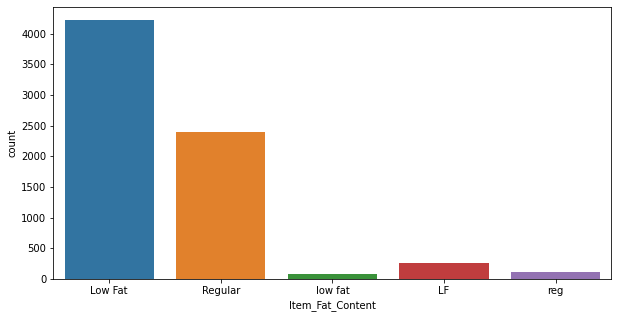

In [34]:
plt.figure(figsize = (10,5))
sns.countplot('Item_Fat_Content', data = Stores_data)

In [ ]:
"""Observation: Low Fat Items are more sold"""

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

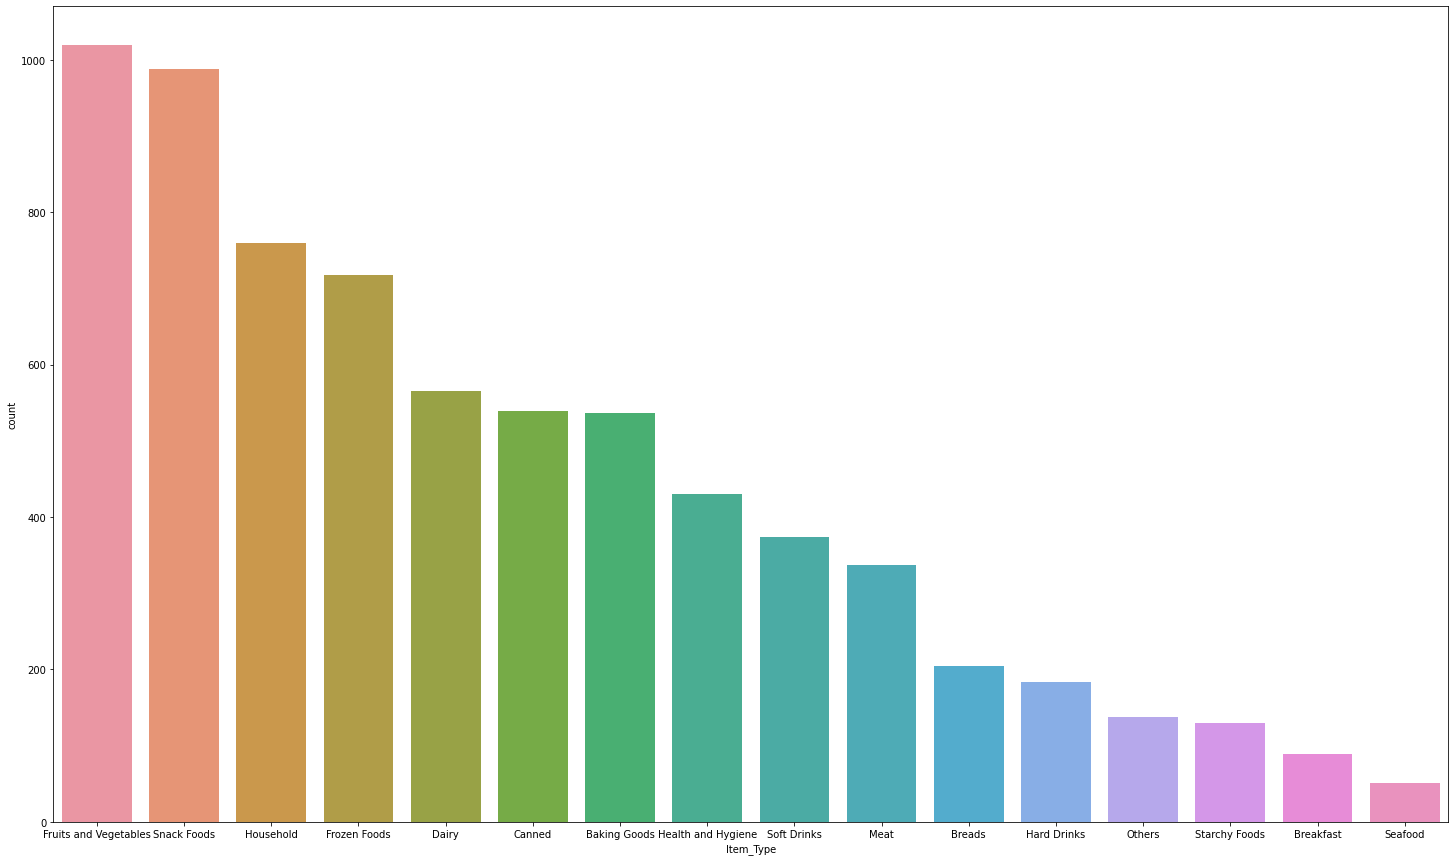

In [35]:
#2.Items contents i,e Item type 
plt.figure(figsize = (25,15))
sns.countplot('Item_Type', data = Stores_data,order = Stores_data['Item_Type'].value_counts().index)

In [ ]:
"""Observation:-Fruits/Vegetables and Snack Foods are the most 
purchased item while seafood is the least"""

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

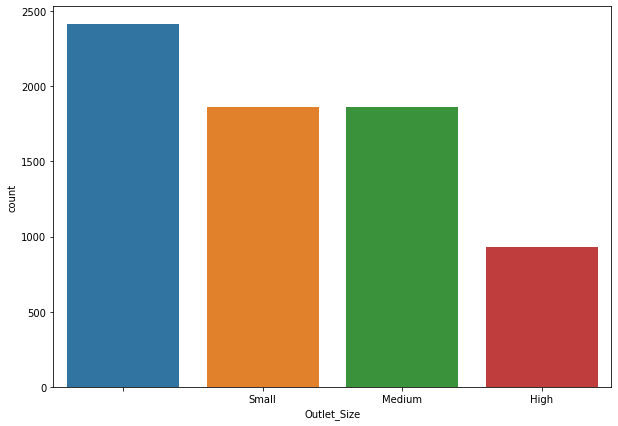

In [36]:
#3.Outlet_Size 
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Size', data = Stores_data,order = Stores_data['Outlet_Size'].value_counts().index)

In [ ]:
"""inference:-People prefer to buy from smal and medium sized outlet ,
There are more Medium sized Outlets while the High sized outlets are less"""

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

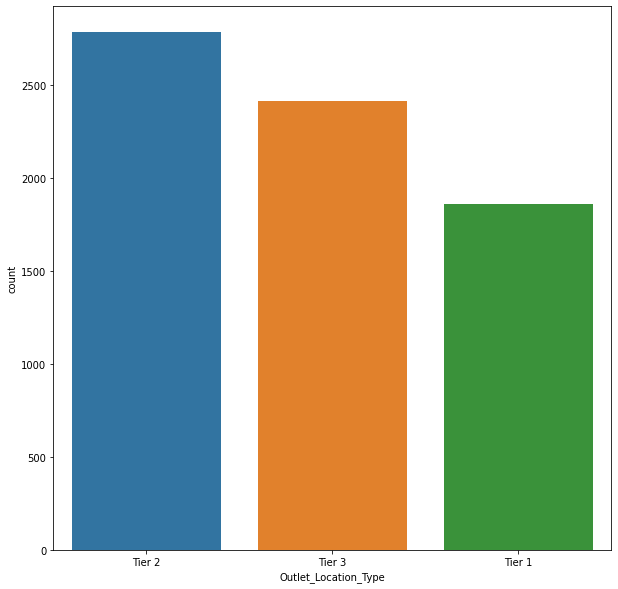

In [37]:
#NUmber of stores in tires- cities 
plt.figure(figsize = (10,10))
sns.countplot('Outlet_Location_Type', data = Stores_data, order = Stores_data['Outlet_Location_Type'].value_counts().index )

In [ ]:
"""inference:-there are more stores in tires 2 cities i.e 
maxumum outlets in tires 3 cities"""

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

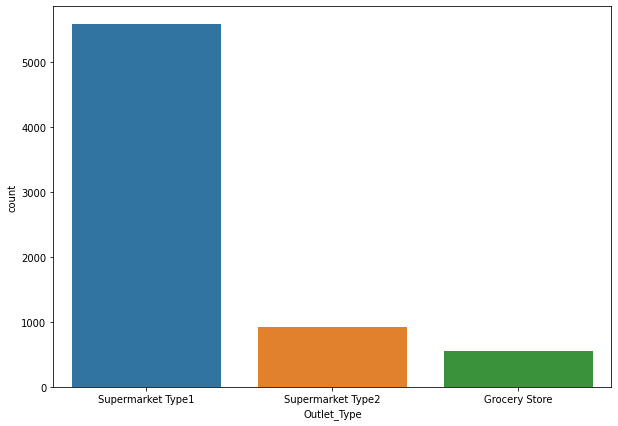

In [38]:
#outlet type stores with tire cities
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Type', data = Stores_data, order = Stores_data['Outlet_Type'].value_counts().index )

In [ ]:
"""inference:- supermarkets type1 are more maxumim outlet
 types than any other outlet types"""

In [ ]:
"""inference:-Most of the outlets are running 37 years onwards
 i.e age of outlet are 37 years"""

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

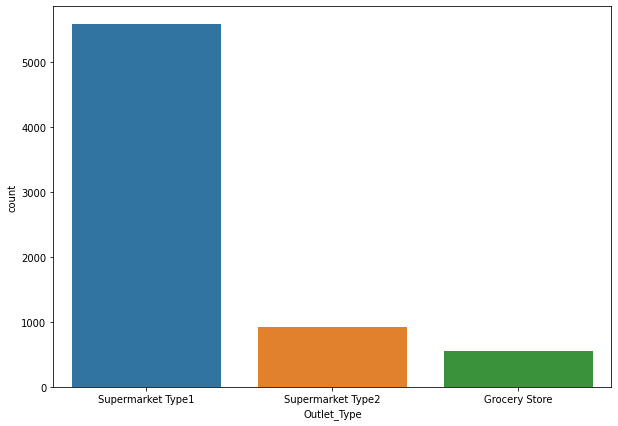

In [39]:
#outlet type stores with tire cities
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Type', data = Stores_data, order = Stores_data['Outlet_Type'].value_counts().index )

In [ ]:
"""inference:- supermarkets are more maxumim outlet
 types than any other outlet types"""

In [ ]:
#EDA part 2:-Bivariate Analysis
"""Bivariate analysis refers to the analysis of two variables to determine
 relationships between them."""

In [ ]:
#Analyzing outlet sales Items Fat Content to Item Outlet Sales

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

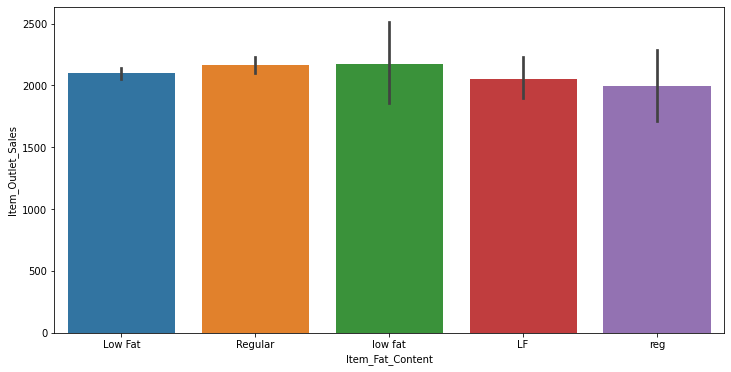

In [40]:
plt.figure(figsize = (12,6))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales', data = Stores_data)

In [ ]:
#Cleaning the Data
"""since Low fat and LF also Regular and reg showwing the equal item sales """

In [41]:
Stores_data["Item_Fat_Content"].value_counts()

Low Fat    4222
Regular    2388
LF          260
reg         106
low fat      84
Name: Item_Fat_Content, dtype: int64

In [42]:
Stores_data["Item_Fat_Content"]=np.where((Stores_data["Item_Fat_Content"] == 'Low Fat')|(Stores_data["Item_Fat_Content"] == 'LF')|(Stores_data["Item_Fat_Content"] == 'low fat'),"Low Fat","Regular")
Stores_data['Outlet_Age']=(2021-Stores_data['Outlet_Establishment_Year']).astype('str')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

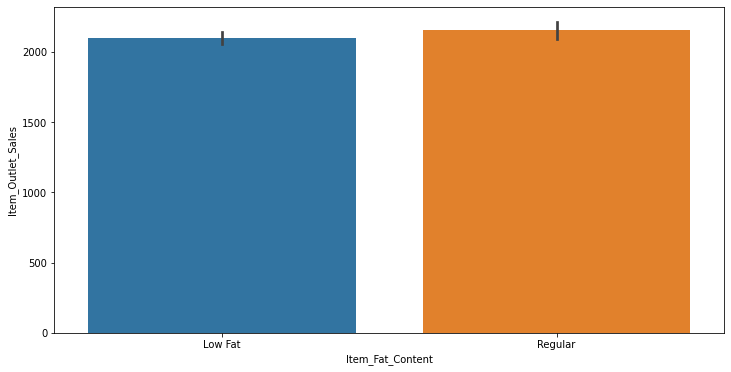

In [43]:
plt.figure(figsize = (12,6))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales', data =Stores_data)

In [ ]:
"""Both low fat and Regular items sale are high in outlet 
sale items both are contributing equal revenue generation"""

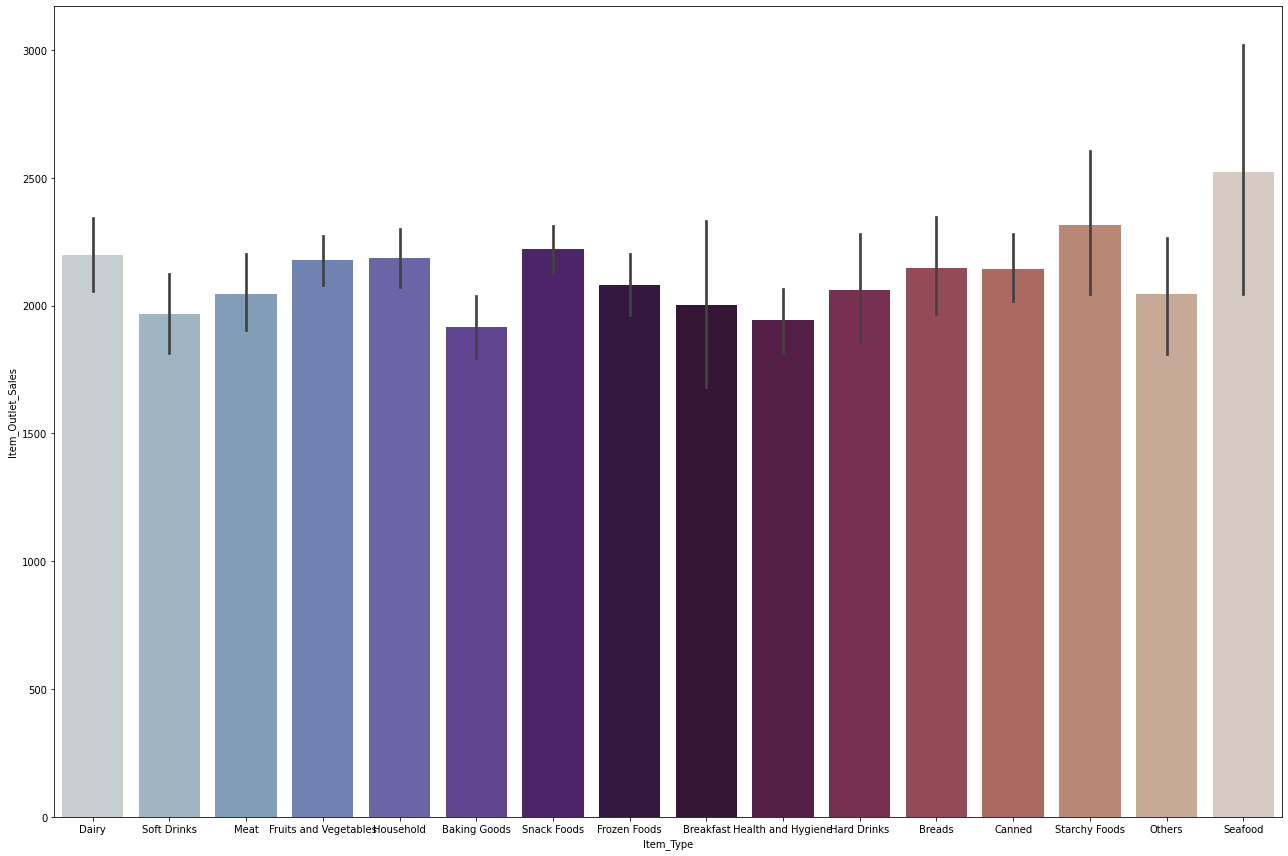

In [44]:
#Item Type to Item Outlet Sales
plt.figure(figsize=(18,12))
sns.barplot(data=Stores_data,x="Item_Type",y="Item_Outlet_Sales",palette='twilight')
plt.tight_layout()
plt.show()

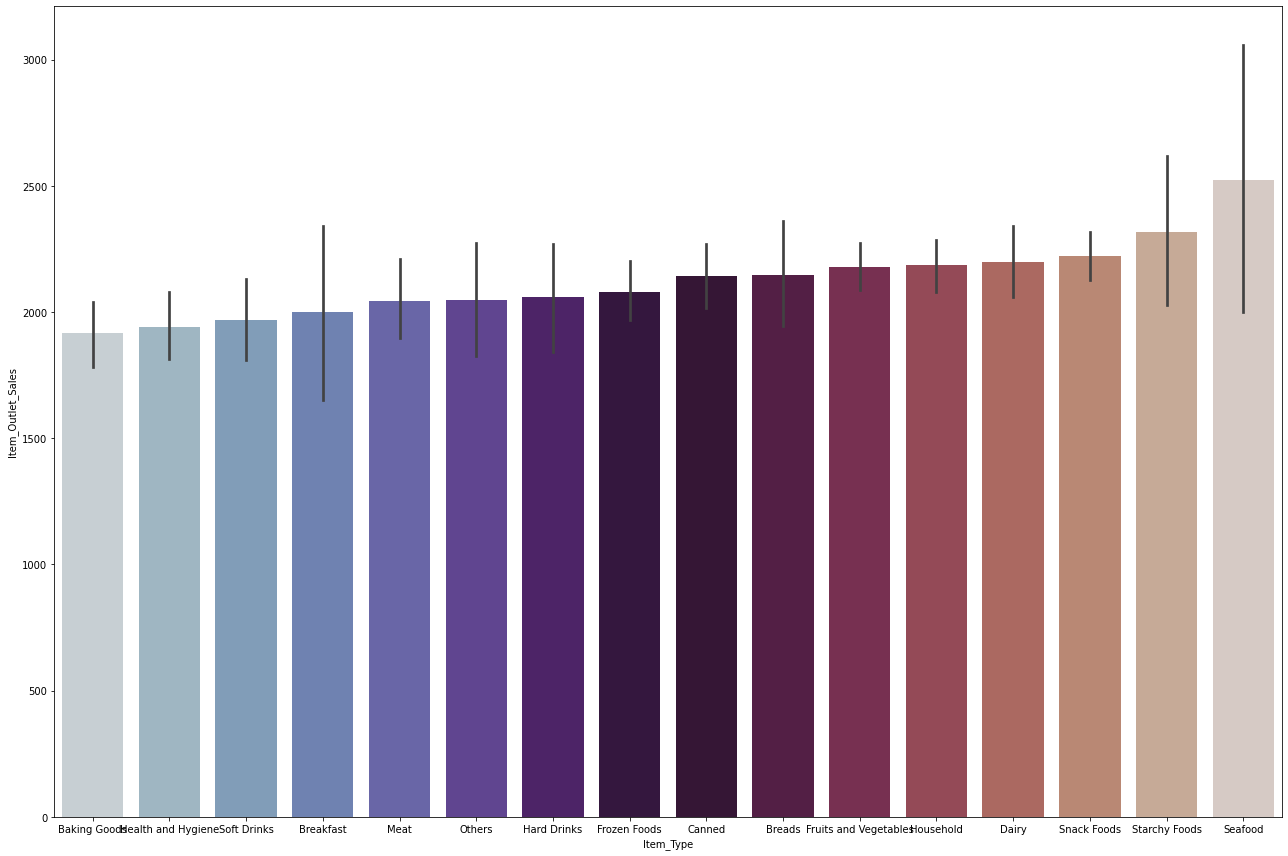

In [45]:
plt.figure(figsize=(18,12))
sns.barplot(data=Stores_data,x="Item_Type",y="Item_Outlet_Sales",
           palette='twilight',order=Stores_data.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values().index)
plt.tight_layout()
plt.show()

In [ ]:
"""we can observe from this bar plot we can observe that 'fruits' and
 'vegitables' are generating hight revenue , however 'seafood' and 'Starchy Foods'
are also generating the revenue so better to focus more on such
 products eventhogh sales are less"""

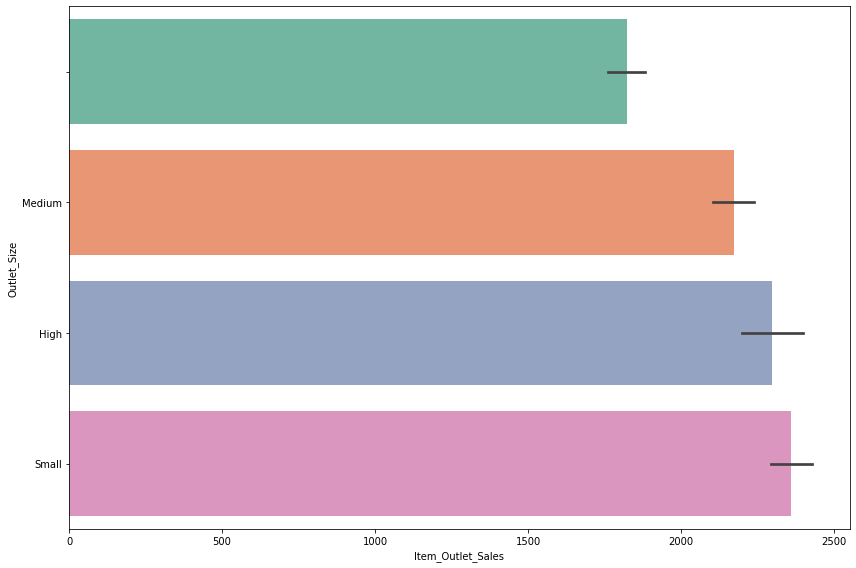

In [46]:
#Outlet Size to Item Outlet Sales
plt.figure(figsize=(12,8))
sns.barplot(data=Stores_data,y="Outlet_Size",x="Item_Outlet_Sales",
            palette='Set2',
                order=Stores_data.groupby("Outlet_Size")["Item_Outlet_Sales"].mean().sort_values().index)
plt.tight_layout()
plt.show()

In [ ]:
"""we can observe fromhere that medium and high size have
 maximum possibility to generate revenue"""

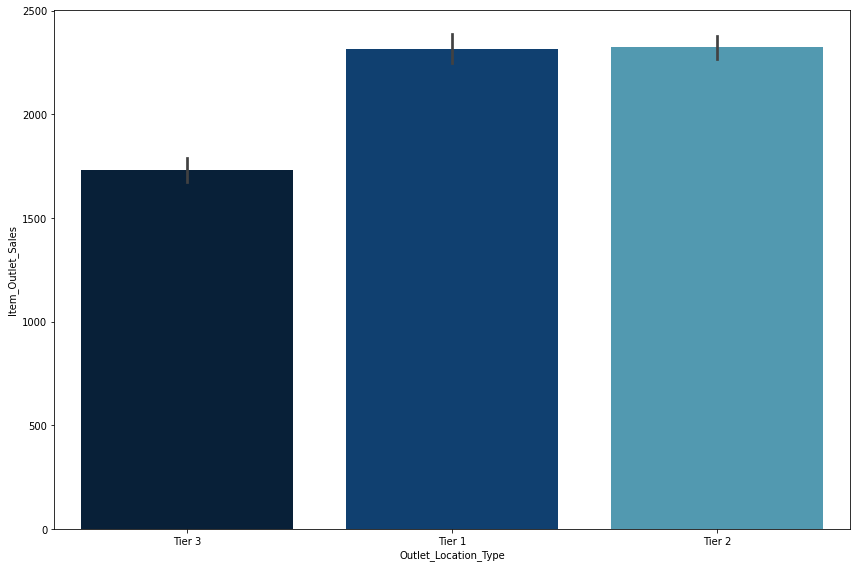

In [47]:
#Outlet Location to Item Outlet Sales
plt.figure(figsize=(12,8))
sns.barplot(data=Stores_data,x="Outlet_Location_Type",y="Item_Outlet_Sales",
            palette='ocean',
              order=Stores_data.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean().sort_values().index)

plt.tight_layout()
plt.show()

In [ ]:
"""we can observe fromhere tire 3 and tire 2 outlet 
locations have maximum revenue generation capacity """

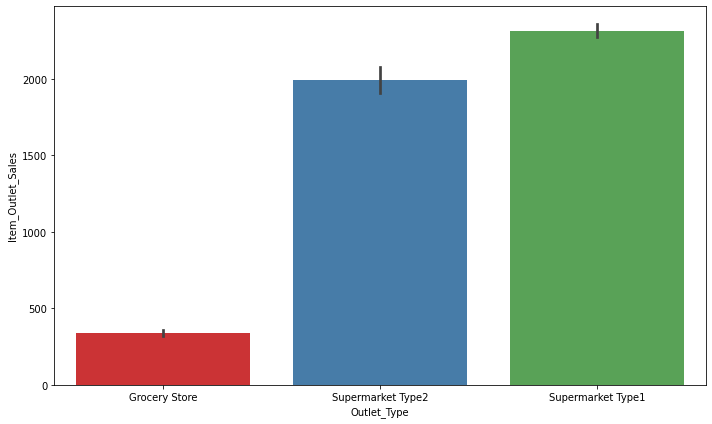

In [48]:
#Outlet Type to Item Outlet Sales
plt.figure(figsize=(10,6))
sns.barplot(data=Stores_data,x="Outlet_Type",y="Item_Outlet_Sales",
            palette='Set1',
                order=Stores_data.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().sort_values().index)

plt.tight_layout()
plt.show()

In [ ]:
"""Type 3- Supermaket have maximum revenue generation 
capacity through type1-Supermaket have maxumim number of outlets """

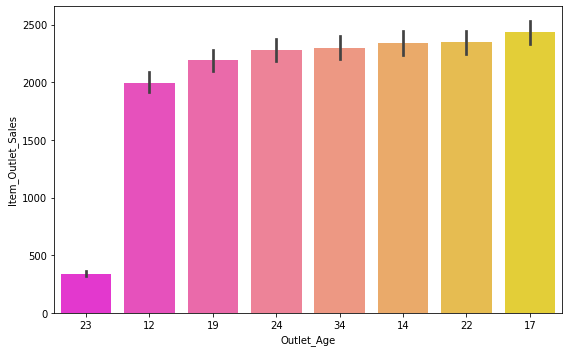

In [49]:
#Outlet Age to Item Outlet Sales
plt.figure(figsize=(8,5))
sns.barplot(data=Stores_data,x="Outlet_Age",y="Item_Outlet_Sales",
            palette='spring',
               order=Stores_data.groupby("Outlet_Age")["Item_Outlet_Sales"].mean().sort_values().index)

plt.tight_layout()
plt.show()

In [ ]:
"""Observation:It is quiet evident that Outlets established 34 years
 before is having good Sales margin. We also have a outlet which was 
 established before 17 years has the heighest sales margin and 23 year 
 have low marigin, 
 so established years wouldn't improve the Sales unless the products
  are sold according to  customer's interest."""

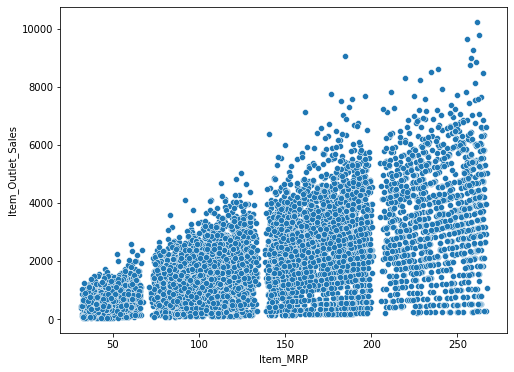

In [50]:
#Item MRP to Item Outlet Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x="Item_MRP",y='Item_Outlet_Sales',data=Stores_data)
plt.show()

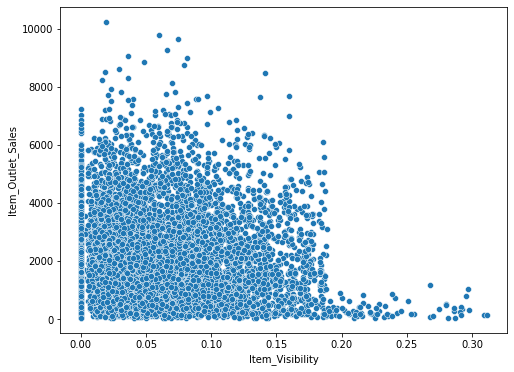

In [51]:
#Item Visiblity to Item Outlet Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x="Item_Visibility",y='Item_Outlet_Sales',data=Stores_data)
plt.show()

In [ ]:
"""We can Observation one intresting inference, 
where the visiblity of Items is Zero, which suggest those items kept behind in shelf 
and amlost have no visiblity can also be sold. This show Consumer tend to
 search for their own products""""

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:title={'center':'years_established'}>]], dtype=object)

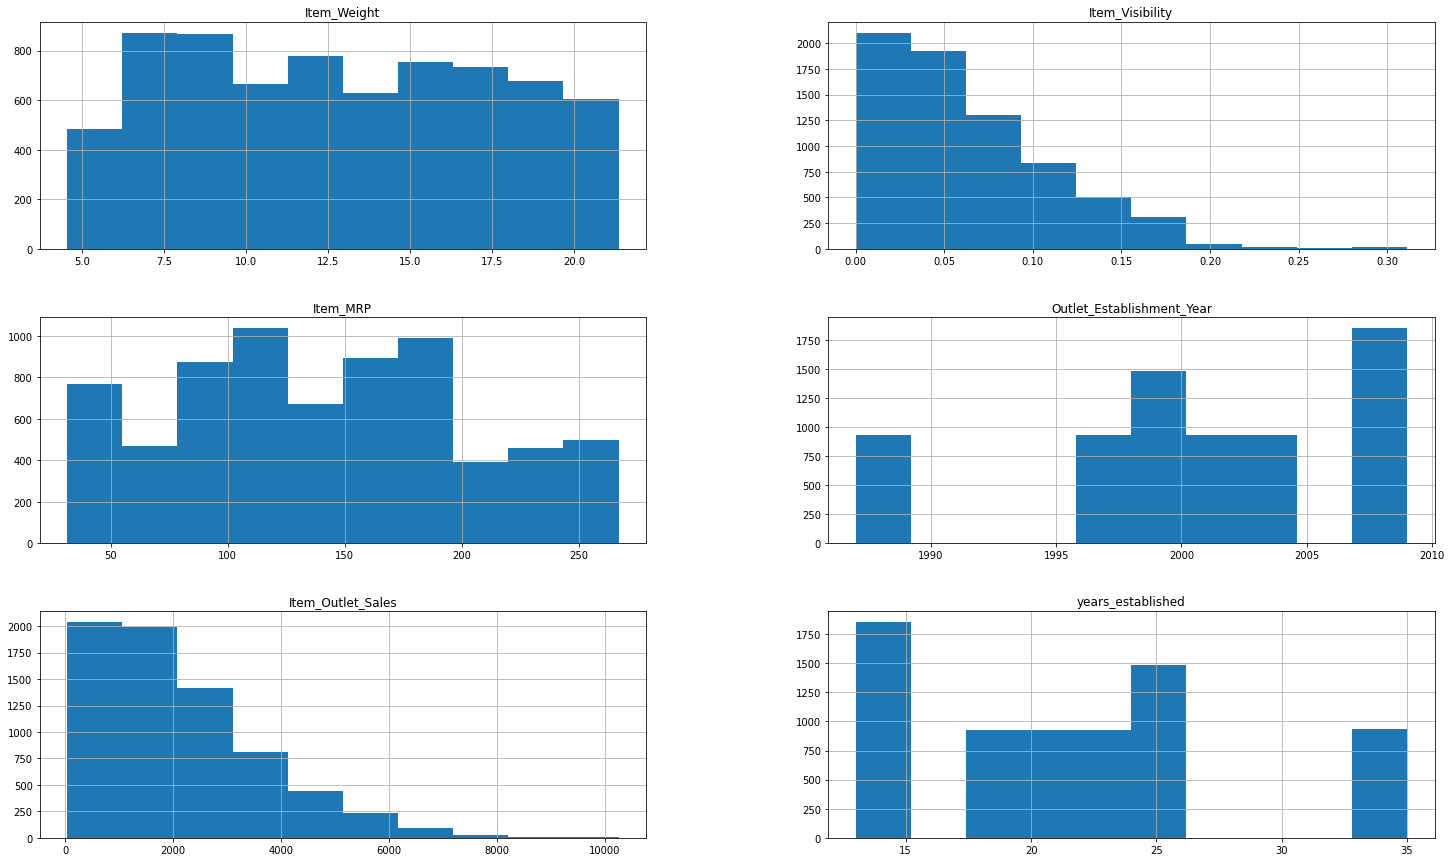

In [52]:
#Distribution Plot
Stores_data.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=(25,15), layout=None, bins=10, backend=None,legend=False)


array([[<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Item_MRP', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='years_established', ylabel='Item_Weight'>],
       [<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Item_MRP', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='years_established', ylabel='Item_Visibility'>],
       [<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>,
        <AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

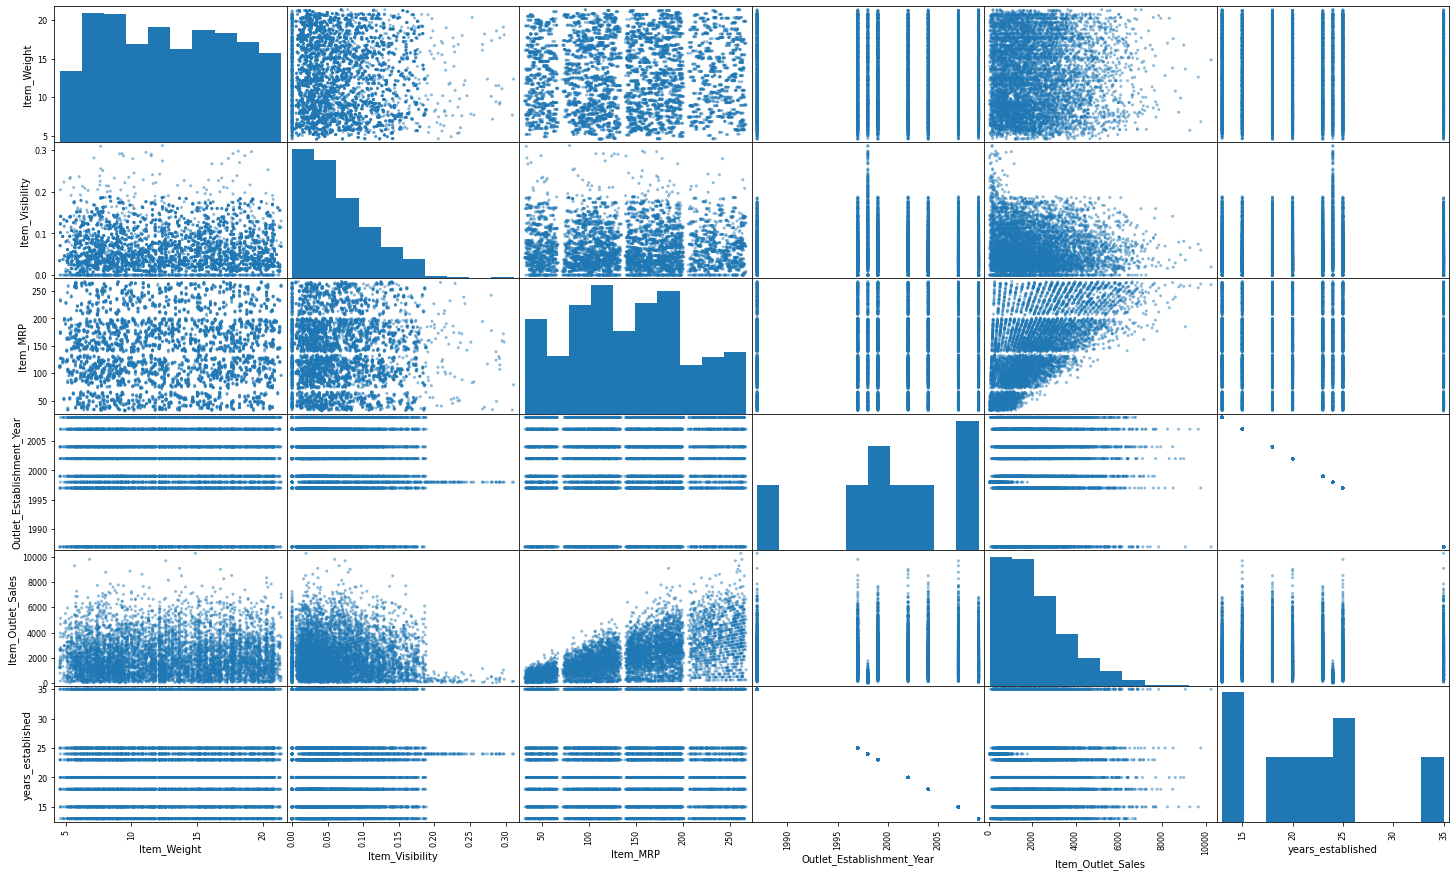

In [53]:
## scatter plot matrix
scatter_matrix(Stores_data, alpha=0.5, figsize=(25,15), ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05)


Item_Weight                     AxesSubplot(0.125,0.749828;0.133621x0.130172)
Item_Visibility              AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Item_MRP                      AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Item_Outlet_Sales            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
years_established               AxesSubplot(0.125,0.593621;0.133621x0.130172)
dtype: object

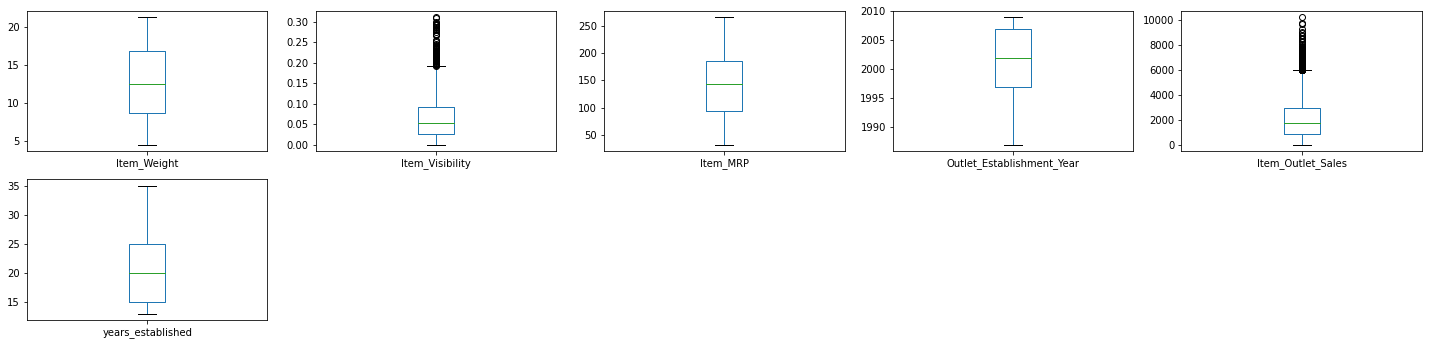

In [54]:
#Outlier
#Univariate Plots
# box and whisker plots

Stores_data.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(25,15))


In [ ]:
"""we can onserve clearly there outliers in 'item_visibility'
 and 'item_ouliers sales"""


In [ ]:
#Handling Outliers 
z1 = np.abs(stats.zscore(Stores_data["Item_Outlet_Sales"]))
for i in (np.where(z1>3)):
   Stores_data.drop(i,inplace=True)
Stores_data.set_index( np.arange(6910),inplace=True )
z2 = np.abs(stats.zscore(Stores_data["Item_Visibility"]))
for i in (np.where(z2>3)):
     Stores_data.drop(i,inplace=True)
     Stores_data.set_index( np.arange(4730),inplace=True )

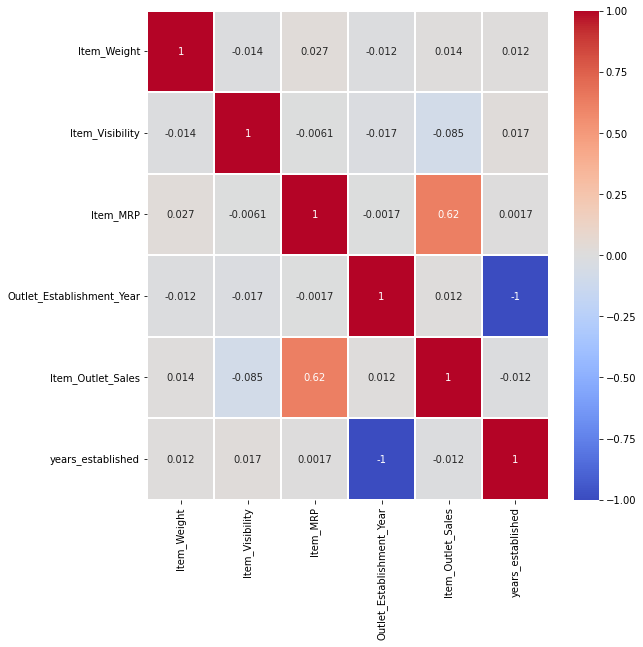

In [55]:
#to understand the correlation between the features 
plt.figure(figsize=(9, 9))
ax = sns.heatmap(data=Stores_data.corr(), cmap='coolwarm', annot=True, linewidths=2)

In [ ]:
#Feature Engineering
#Deal with categorical features 

In [56]:
Stores_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_established,Outlet_Age
0,FDA15,9.30,Low Fat,0.01605,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13794,23,22
1,DRC01,5.92,Regular,0.01928,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42279,13,12
2,FDN15,17.50,Low Fat,0.01676,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27002,23,22
3,FDX07,19.20,Regular,0.00000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.38000,24,23
4,NCD19,8.93,Low Fat,0.00000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520,35,34


In [ ]:
"""we can observe here the features Item_Identifier, Outlet_Identifier and Outlet_Establishment_Year 
are supposed to be dropped as they don't seem to be helping in our analysis."""

In [57]:
Stores_data.drop(columns = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1, inplace = True)

In [58]:
#drop Outlet_Establishment_Year (Its oprtinal)
Stores_data.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_established,Outlet_Age
0,9.30,Low Fat,0.01605,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.13794,23,22
1,5.92,Regular,0.01928,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.42279,13,12
2,17.50,Low Fat,0.01676,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.27002,23,22
3,19.20,Regular,0.00000,Fruits and Vegetables,182.0950,,Tier 3,Grocery Store,732.38000,24,23
4,8.93,Low Fat,0.00000,Household,53.8614,High,Tier 3,Supermarket Type1,994.70520,35,34


In [59]:
Stores_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'years_established', 'Outlet_Age'],
      dtype='object')

In [60]:
#Label Encoding
encoder = LabelEncoder()

In [61]:
elements =Stores_data.select_dtypes(include=['object']).columns

In [62]:
elements

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Age'],
      dtype='object')

In [ ]:
"""Converting all the above catagorial datatypes to Label encoding"""

In [63]:
for i in elements:
    Stores_data[i] = encoder.fit_transform(Stores_data[i])

In [64]:
Stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060 entries, 0 to 7059
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      7060 non-null   int32  
 2   Item_Visibility       7060 non-null   float64
 3   Item_Type             7060 non-null   int32  
 4   Item_MRP              7060 non-null   float64
 5   Outlet_Size           7060 non-null   int32  
 6   Outlet_Location_Type  7060 non-null   int32  
 7   Outlet_Type           7060 non-null   int32  
 8   Item_Outlet_Sales     7060 non-null   float64
 9   years_established     7060 non-null   int64  
 10  Outlet_Age            7060 non-null   int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 441.4 KB


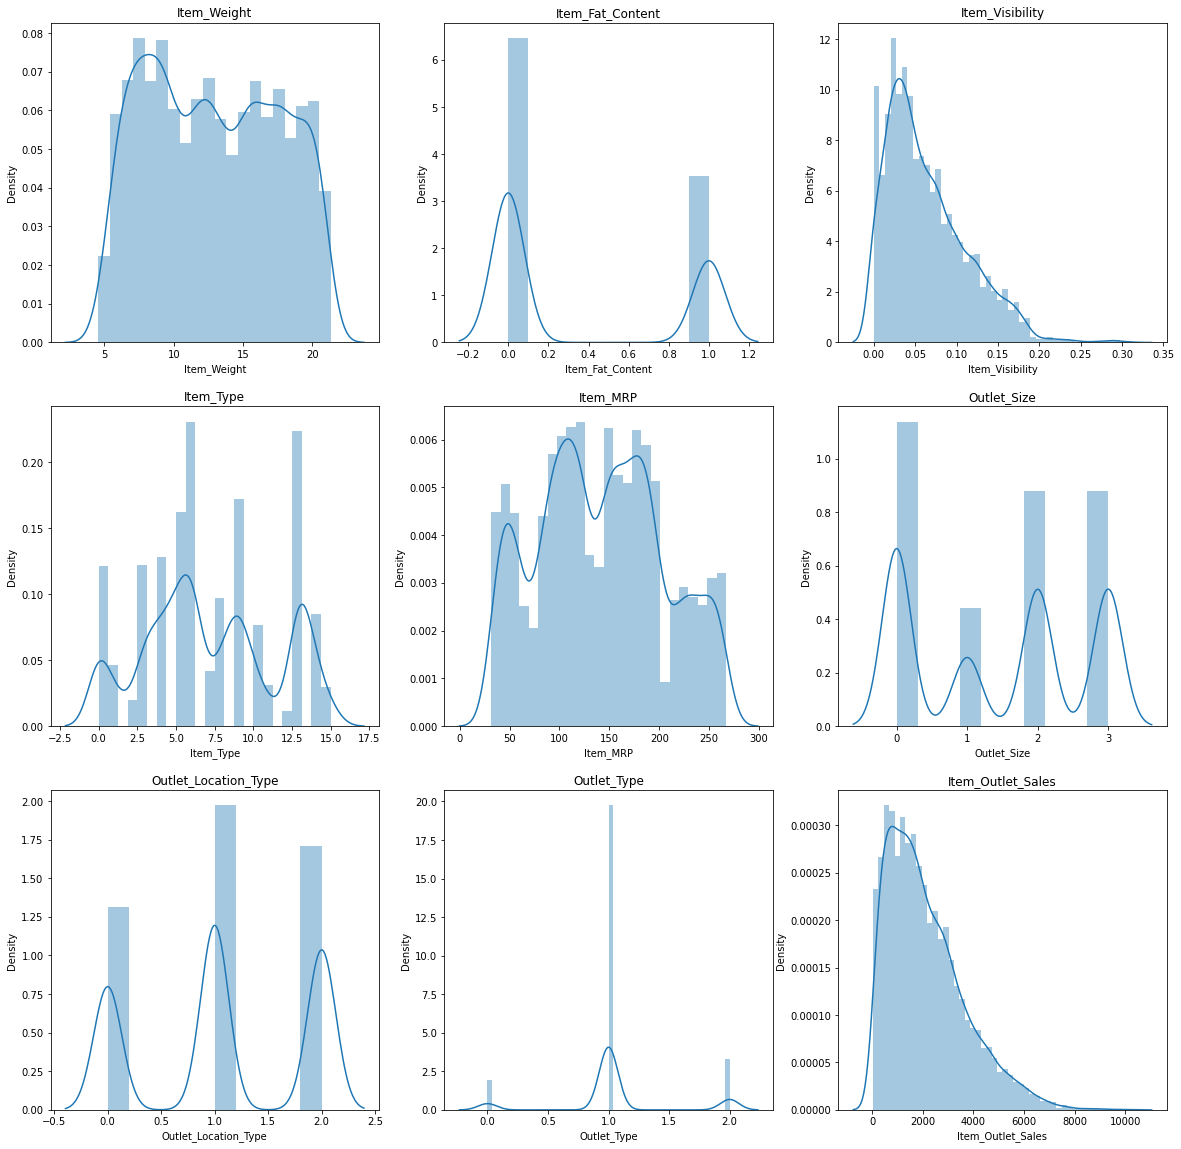

In [65]:
# Distribution of all columns

fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 20)

for ax, col in zip(axes, Stores_data.columns):
  sns.distplot(Stores_data[col], ax = ax)
  ax.set_title(col)

In [66]:
Stores_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_established,Outlet_Age
0,9.30,0,0.01605,4,249.8092,2,0,1,3735.13794,23,4
1,5.92,1,0.01928,14,48.2692,2,2,2,443.42279,13,0
2,17.50,0,0.01676,10,141.6180,2,0,1,2097.27002,23,4
3,19.20,1,0.00000,6,182.0950,0,2,0,732.38000,24,5
4,8.93,0,0.00000,9,53.8614,1,2,1,994.70520,35,7


In [67]:
#send data set into required drive 
import os  
os.makedirs('C:/Users/Krish', exist_ok=True)  
Stores_data.to_csv('C:/Users/Krish/out.csv') 

In [ ]:
#Defining X and y variable

In [68]:
X = Stores_data.drop(['Item_Outlet_Sales'], axis = 1)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,years_established,Outlet_Age
0,9.30,0,0.01605,4,249.8092,2,0,1,23,4
1,5.92,1,0.01928,14,48.2692,2,2,2,13,0
2,17.50,0,0.01676,10,141.6180,2,0,1,23,4
3,19.20,1,0.00000,6,182.0950,0,2,0,24,5
4,8.93,0,0.00000,9,53.8614,1,2,1,35,7


In [69]:
y = Stores_data['Item_Outlet_Sales']
y.head()

0    3735.13794
1     443.42279
2    2097.27002
3     732.38000
4     994.70520
Name: Item_Outlet_Sales, dtype: float64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42 )

In [71]:
print(X.shape, X_train.shape, X_test.shape)

(7060, 10) (5648, 10) (1412, 10)


In [72]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'years_established', 'Outlet_Age'],
      dtype='object')

In [73]:
features=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'years_established', 'Outlet_Age']

In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def minmax(train,test):
    scaler = MinMaxScaler(feature_range=(0, 1))
    x_train_scaled = scaler.fit_transform(train)
    X_train = pd.DataFrame(data=x_train_scaled, columns = list(train.columns))
    x_test_scaled = scaler.fit_transform(X_test)
    X_test = pd.DataFrame(data=x_train_scaled, columns = list(X_test.columns))
    return X_train,X_test
def standard(train,test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(train)
    X_train = pd.DataFrame(data=x_train_scaled, columns = list(train.columns))
    x_test_scaled = scaler.fit_transform(X_test)
    X_test = pd.DataFrame(data=x_train_scaled, columns = list(X_test.columns))
    return X_train,X_test

In [ ]:
#Model Building
#1) Linear Regression

In [74]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_,features).sort_values()

In [75]:
coef2

Outlet_Location_Type   -614.304813
Item_Visibility        -550.803359
Outlet_Age             -516.061945
Item_Weight              -1.687945
Item_Type                 1.718341
Item_MRP                 15.056221
Outlet_Size              16.234506
Item_Fat_Content         48.059411
years_established       186.493256
Outlet_Type             462.960868
dtype: float64

<AxesSubplot:>

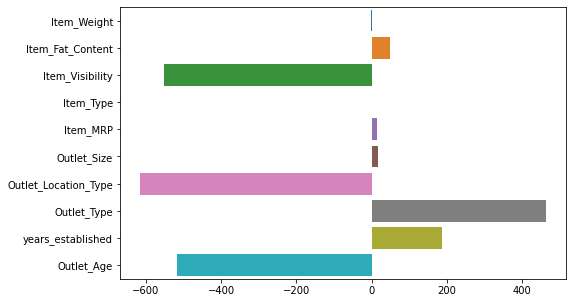

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

In [ ]:
#Evaluation LR Model
#R2 Scores


In [77]:
r2_Linear_Regression = r2_score(y_test, y_pred)
print('R2 score of Linear regression:',r2_Linear_Regression)

R2 score of Linear regression: 0.5238433251679604


In [78]:
#MAE(Mean Absolute error) and MSE(Mean squared error)
MAE = metrics.mean_absolute_error(y_test, y_pred) 
MSE = metrics.mean_squared_error(y_test, y_pred)

In [79]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 778.283521544846
mean squared error: 1157536.857905343


In [80]:
#RMSE(Root Mean Squared error)
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1075.888868752411


In [81]:
#2) Random Forest Regressor
RF = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

In [82]:
# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)
# Making Predictions
y_pred = RF.predict(X_test)

In [83]:
coef3 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef3

Item_MRP                0.762799
Outlet_Type             0.205896
Outlet_Location_Type    0.013829
Item_Visibility         0.003694
years_established       0.003427
Outlet_Age              0.002864
Outlet_Size             0.002793
Item_Weight             0.002668
Item_Type               0.001958
Item_Fat_Content        0.000073
dtype: float64

<AxesSubplot:>

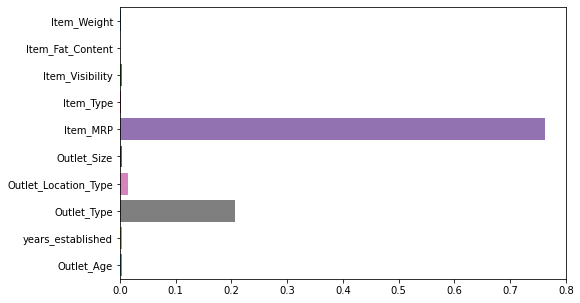

In [84]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features)

In [85]:
#3) Lasso
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

In [86]:
#Cross-validation

def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [87]:
cross_val(LR,LinearRegression(),X,y,5)


LinearRegression(normalize=True) Scores:
0.5
0.48
0.46
0.5
0.49
Average LinearRegression(normalize=True) score: 0.48


In [88]:
cross_val(RF,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.47
0.46
0.45
0.5
0.47
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.47


In [89]:
cross_val(LS,Lasso(),X,y,5)

Lasso(alpha=0.05) Scores:
0.5
0.48
0.46
0.5
0.49
Average Lasso(alpha=0.05) score: 0.48


In [90]:
#HyperParameter Tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.453 using {'n_estimators': 1000}
0.406 (0.002) with: {'n_estimators': 10}
0.447 (0.006) with: {'n_estimators': 100}
0.453 (0.003) with: {'n_estimators': 1000}


In [91]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [92]:
grid_search_forest.best_score_

0.45320028130272927

In [93]:
Y_pred_rf_grid=grid_search_forest.predict(X_test)

In [94]:
grid_r2 = r2_score(y_test,Y_pred_rf_grid)
print('R2 score for Grid Search: ',grid_r2*100)

R2 score for Grid Search:  52.53936752244841


In [95]:
cross_val(model,RandomForestRegressor(),X,y,5)

RandomForestRegressor() Scores:
0.46
0.46
0.45
0.5
0.46
Average RandomForestRegressor() score: 0.47


In [ ]:
"""observation: Hyperperameter tuning did not drastically change the model performance so we will be using the default LinearRegression as our model."""

In [123]:
#Saving the model
import pickle
pickle.dump(LR,open('lr.pkl','wb'))